# Google Cloud Service / Bigquery Example
This is a setup notebook

Make sure to have these installed:

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Importing required libraries
import requests  # To make HTTP requests and fetch data from APIs
import pandas as pd  # To store, manipulate, and clean tabular data
import sqlite3  # To interact with an SQLite database for data storage
import json  # To handle JSON data from APIs
import matplotlib.pyplot as plt  # Optional, for data visualization
import os # working with operating system functions


This cell is a function to fetch data via batch from the api since you can't just request all the data in one.

In [19]:
import os
import json
import requests
import time

def fetch_api_data(api_url, output_file, batch_size=1000, num_records=None):
    """
    Fetches all data from the API in chunks using $limit and $offset parameters, 
    and saves each batch to a file incrementally.

    Parameters:
    - api_url (str): The base URL of the API.
    - output_file (str): Path to the JSON file to save data incrementally.
    - batch_size (int): Number of records to fetch per request (default: 1000).
    - num_records (int or None): Maximum number of records to fetch. If None, fetch all records.
    """
    offset = 0
   
    # Check if the output file already exists and load existing data
    try:
        if os.path.exists(output_file):
            with open(output_file, "r") as f:
                all_data = json.load(f)
                print(f"Resuming from {len(all_data)} records in {output_file}.")
        else:
            all_data = []
    except (json.JSONDecodeError, FileNotFoundError):
        print(f"{output_file} is corrupted or empty. Starting fresh.")
        all_data = []

    # Calculate the starting offset based on existing data
    offset = len(all_data)
    print(f"Starting from offset {offset}...")

    while True:
        # Adjust batch size to not exceed num_records if specified
        if num_records is not None:
            remaining_records = num_records - len(all_data)
            if remaining_records <= 0:
                break
            batch_size = min(batch_size, remaining_records)

        # Add $limit and $offset parameters to the API URL
        paginated_url = f"{api_url}?$limit={batch_size}&$offset={offset}"
        print(f"Fetching records starting at offset {offset}...")

        # Fetch data from the API
        try:
            response = requests.get(paginated_url, timeout=10)
            response.raise_for_status()
            batch_data = response.json()

            # Print raw response for debugging
            print(f"Fetched {len(batch_data)} records from the API.")

        except requests.exceptions.RequestException as e:
            print(f"Error fetching data: {e}")
            time.sleep(5)  # Wait before retrying
            continue
        except json.JSONDecodeError:
            print("Error decoding JSON response.")
            break

        # Stop if no more data is returned
        if not batch_data:
            print("No more data to fetch.")
            break

        # Append the batch to the combined data list
        all_data.extend(batch_data)

        # Save the updated data to the output file incrementally
        with open(output_file, "w") as f:
            json.dump(all_data, f, indent=2)
        print(f"Appended {len(batch_data)} records. Total records saved: {len(all_data)}")

        # Update offset to fetch the next batch
        offset += batch_size

        # Stop if a specific number of records is requested and reached
        if num_records is not None and len(all_data) >= num_records:
            print(f"Reached the specified number of records: {num_records}.")
            break

        # Break if the batch size is less than the limit, indicating the end of the dataset
        if len(batch_data) < batch_size:
            print("Reached the end of the dataset.")
            break

    print(f"Fetched a total of {len(all_data)} records. Data saved to {output_file}.")
    return all_data

# API URL
api_url = "https://data.cityofnewyork.us/resource/43nn-pn8j.json"

# Output file path
output_file = "nyc_data.json"

# Call the function to fetch data
fetch_api_data(api_url, output_file, batch_size=1000, num_records=None)


Resuming from 100000 records in nyc_data.json.
Starting from offset 100000...
Fetching records starting at offset 100000...
Fetched 1000 records from the API.
Appended 1000 records. Total records saved: 101000
Fetching records starting at offset 101000...
Fetched 1000 records from the API.
Appended 1000 records. Total records saved: 102000
Fetching records starting at offset 102000...
Fetched 1000 records from the API.
Appended 1000 records. Total records saved: 103000
Fetching records starting at offset 103000...
Fetched 1000 records from the API.
Appended 1000 records. Total records saved: 104000
Fetching records starting at offset 104000...
Fetched 1000 records from the API.
Appended 1000 records. Total records saved: 105000
Fetching records starting at offset 105000...
Fetched 1000 records from the API.
Appended 1000 records. Total records saved: 106000
Fetching records starting at offset 106000...
Fetched 1000 records from the API.
Appended 1000 records. Total records saved: 10700

KeyboardInterrupt: 

This is where the current directory is, it should be where you have this notebook

In [3]:
print(os.getcwd())

C:\Users\Pasupuleti\Downloads\ecen_360


Fetch the data:
make sure the json file path is correct for you (I append the json name to the end of the cwd)

In [25]:
# API URL for NYC COVID-19 Outcomes dataset
api_url = "https://data.cityofnewyork.us/resource/43nn-pn8j.json"
 
# Store json data set. You will need to adjust this paths
json_file_path = r'C:\Users\Pasupuleti\Downloads\ecen_360\nyc_data.json'

# Fetch the data
api_data = fetch_api_data(api_url = api_url, output_file = json_file_path, batch_size=1000, num_records=100000)

# Verify the total number of records fetched
print(f"Total records fetched: {len(api_data)}")

# Display a sample of the data to inspect
if api_data:
    print("Sample data (first 5 records):")
    print(json.dumps(api_data[:5], indent=2))

C:\Users\Pasupuleti\Downloads\ecen_360\nyc_data.json is corrupted or empty. Starting fresh.
Starting from offset 0...
Fetching records starting at offset 0...
Fetched 1000 records from the API.
Appended 1000 records. Total records saved: 1000
Fetching records starting at offset 1000...
Fetched 1000 records from the API.
Appended 1000 records. Total records saved: 2000
Fetching records starting at offset 2000...
Fetched 1000 records from the API.
Appended 1000 records. Total records saved: 3000
Fetching records starting at offset 3000...
Fetched 1000 records from the API.
Appended 1000 records. Total records saved: 4000
Fetching records starting at offset 4000...
Fetched 1000 records from the API.
Appended 1000 records. Total records saved: 5000
Fetching records starting at offset 5000...
Fetched 1000 records from the API.
Appended 1000 records. Total records saved: 6000
Fetching records starting at offset 6000...
Fetched 1000 records from the API.
Appended 1000 records. Total records s

KeyboardInterrupt: 

Now that we got the data make it a pandas data frame!
and show some info for it

In [ ]:
df = pd.read_json(json_file_path)

print(df.head())

# Display the first few rows to inspect the structure
print("Sample DataFrame (first 5 rows):")
print(df.head())

# Display information about the DataFrame's structure and data types
print("\nDataFrame Info:")
print(df.info())

# Display summary statistics for numeric columns
print("\nSummary Statistics for Numeric Columns:")
print(df.describe())

This next cell makes sure you have the required python modules installed, if not, pip install them

In [28]:
import subprocess

# List of required libraries
required_libraries = ["pandas", "google-cloud-bigquery", "google-cloud-storage", "google-auth", "google-cloud-bigquery","pyarrow","cachetools","db-dtypes"]

# Function to check and install missing libraries
def check_and_install_library(library):
    try:
        __import__(library.split("-")[0])  # Check if the library is installed
        print(f"✅ Library '{library}' is already installed.")
    except ImportError:
        print(f"❌ Library '{library}' is missing.")
        print(f"Installing '{library}'...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", library])
            print(f"🎉 Successfully installed '{library}'!")
        except Exception as e:
            print(f"🚨 Error installing '{library}': {e}")
            print("👉 Try running the following command in your terminal:")
            print(f"pip install {library}")

# Check and install libraries
for lib in required_libraries:
    check_and_install_library(lib)

✅ Library 'pandas' is already installed.
✅ Library 'google-cloud-bigquery' is already installed.
✅ Library 'google-cloud-storage' is already installed.
✅ Library 'google-auth' is already installed.
✅ Library 'google-cloud-bigquery' is already installed.
✅ Library 'pyarrow' is already installed.
✅ Library 'cachetools' is already installed.
❌ Library 'db-dtypes' is missing.
Installing 'db-dtypes'...
🚨 Error installing 'db-dtypes': name 'sys' is not defined
👉 Try running the following command in your terminal:
pip install db-dtypes


In [30]:
pip install db-dtypes


Make sure the service account works. Please check the json key path is correct for you.

In [5]:
from google.oauth2 import service_account
from google.cloud import bigquery

# Replace the key path variable with the path to your downloaded JSON key file
key_path = r"nycrest-20ce24cbc0f6.json"

try:
    # Authenticate using the Service Account
    credentials = service_account.Credentials.from_service_account_file(key_path)
    client = bigquery.Client(credentials=credentials, project=credentials.project_id)
    print(f"🎉 Successfully authenticated! Project ID: {credentials.project_id}")
except Exception as e:
    print(f"❌ Authentication failed: {e}")
    print("👉 Troubleshooting Tips:")
    print("- Ensure the key file path is correct.")
    print("- Verify the Service Account has the BigQuery Admin role.")
    print("- Confirm the BigQuery API is enabled for your project.")

🎉 Successfully authenticated! Project ID: nycrest


Now we need to learn how to upload data to the service

The project and dataset ID should be correct, I handle those.

In [9]:
import pandas as pd
from sqlite3 import connect
from google.cloud import bigquery
from google.oauth2 import service_account

  # Replace with your SQLite database file from the first assignment
BIGQUERY_KEY_FILE = r"nycrest-20ce24cbc0f6.json"  # Replace with your Service Account JSON key file that you just downloaded
PROJECT_ID = "nycrest"  # Replace with your GCP Project ID
DATASET_ID = "rest_data"

Here is a function to upload to bigquery

In [9]:
def upload_to_bigquery(dataframe, table_name):
    """
    Upload a Pandas DataFrame to a BigQuery table.
    
    Args:
        dataframe (pd.DataFrame): The DataFrame to upload.
        table_name (str): The name of the BigQuery table (e.g., "your_dataset_id.table_name").
    """
    try:
        # Authenticate and initialize the BigQuery client
        credentials = service_account.Credentials.from_service_account_file(BIGQUERY_KEY_FILE)
        client = bigquery.Client(credentials=credentials, project=PROJECT_ID)

        # Define table ID
        table_id = f"{PROJECT_ID}.{DATASET_ID}.{table_name}"
        
        # Configure the load job
        job_config = bigquery.LoadJobConfig(
            write_disposition=bigquery.WriteDisposition.WRITE_APPEND,  # Append to existing table
            create_disposition=bigquery.CreateDisposition.CREATE_IF_NEEDED  # Create table if not exists
        )

        # Start the upload job
        print(f"🔄 Uploading {len(dataframe)} records to BigQuery table: {table_id}")
        job = client.load_table_from_dataframe(dataframe, table_id, job_config=job_config)
        job.result()  # Wait for the job to complete
        print(f"✅ Successfully uploaded {len(dataframe)} records to {table_id}")
    except Exception as e:
        print(f"❌ Error uploading to BigQuery: {e}")


This is a function to handle the upload.

Please note two lines in particular. table_name and table_ID, you change those to reflect the table you want to create or update.

In [10]:
def push_to_bigquery(dataframe):
    """
    Full workflow to load data from SQLite and upload to BigQuery.
    """
    print("🔄 Starting the workflow to upload data to BigQuery...")
    
    if not dataframe.empty:
        # Specify the table name
        table_name = "data_table"  # Replace with your desired BigQuery table name
        table_ID = "rest_data.data_table"
        try:
            client.get_table(table_ID)  # Make an API request.
            print("🔎 Table {} already exists.".format(table_ID))
            print("❌ Halting push request.")
        except:
            print("🔎 Table {} is not found.".format(table_ID))
            # Upload data to BigQuery
            print("👍 Continuing Upload")
            upload_to_bigquery(dataframe, table_name)
        
        # Upload data to BigQuery
        #upload_to_bigquery(dataframe, table_name)
    else:
        print("⚠️ No data found in the 'data_table' table. Workflow skipped.")



This cell simply calls the above function which sanity checks the upload attempt and then calls the upload function

In [11]:
push_to_bigquery(df)

🔄 Starting the workflow to upload data to BigQuery...
🔎 Table rest_data.data_table already exists.
❌ Halting push request.


Please read the above functions in order to see how uploading to a table works. TLDR:

the project ID is:  
nycrest (NYC resturaunt)  

The dataset ID is:  
rest_data (restuarant data)  

The table ID is: the combo of project and dataset and the table name, in our case:  
nycrest.rest_data.table_name  
where you replace table_name with the table you want to upload the data into. You can make a new table by just choosing a new name. This does not delete the old table so attempt to upload to the old table. The default value for:  

job = client.load_table_from_dataframe(dataframe, table_id, job_config=job_config)  

is to append data, make sure you overwrite instead if you are uploading to a table eg, cleaned_data

Read here for more information!

https://cloud.google.com/bigquery/docs/managing-table-data#bigquery_browse_table-python

Now we should know about pushing data to bigquery, let's do a real short example of grabbing data:

In [94]:
credentials = service_account.Credentials.from_service_account_file(BIGQUERY_KEY_FILE)
client = bigquery.Client(credentials=credentials, project=PROJECT_ID)

project_id = "nycrest"

query = """
    SELECT *
    FROM `nycrest.rest_data.data_table`
    LIMIT 10
"""

data = client.query_and_wait(query).to_dataframe()

In [96]:
data.shape

(10, 26)

In [11]:
credentials = service_account.Credentials.from_service_account_file(BIGQUERY_KEY_FILE)
client = bigquery.Client(credentials=credentials, project=PROJECT_ID)

project_id = "nycrest"

query = """
    SELECT *
    FROM `nycrest.rest_data.data_table`
    LIMIT 10
"""

data = client.query_and_wait(query).to_dataframe()

In [17]:
data

camis                                            dba       boro  \
0  50063280                           ENZO'S OF ARTHUR AVE      Bronx   
1  41629672                                         DUNKIN     Queens   
2  40376515  AMERICAN MUSEUM OF NATURAL HISTORY FOOD COURT  Manhattan   
3  50133264                             NOM WAH (KIOSK 11)  Manhattan   
4  50104563                                     Sushi Teru  Manhattan   
5  50112612                            PIXIE SCOUT CANTEEN  Manhattan   
6  41698490                       AMBASSADOR FOOD SERVICES     Queens   
7  50118692                                  BUBBY'S DINER     Queens   
8  50103409                    EAT PRETTY COFFEE + KITCHEN  Manhattan   
9  50002431                                      DUE AMICI     Queens   

  building                        street zipcode       phone  \
0     None                    ARTHUR AVE   10458  7187334455   
1     None     JFK INTERNATIONAL AIRPORT   11430  6316620284   
2     None                   W 79 STREET   10024  2127695370   
3  PIER 57                      KIOSK 11   10011  6467634242   
4  615 1/2                 HUDSON STREET   10014  6469228677   
5     None  BATTERY PARK THE BOSQUE AREA   10004  3472357158   
6     8 07                     38 AVENUE   11101  7184722658   
7     None        TERMINAL C CONCOURSE E   11371  2159970667   
8  501 1/2              EAST   83 STREET   10028  6465908190   
9     None     JFK INTERNATIONAL AIRPORT   11430  6464835087   

  cuisine_description          inspection_date  \
0             Italian  2021-09-12T00:00:00.000   
1              Donuts  2024-09-20T00:00:00.000   
2            American  2022-01-12T00:00:00.000   
3             Chinese  2023-10-04T00:00:00.000   
4            Japanese  2023-03-31T00:00:00.000   
5            American  2024-07-17T00:00:00.000   
6            American  2022-07-29T00:00:00.000   
7   Bottled Beverages  2024-10-30T00:00:00.000   
8          Coffee/Tea  2023-08-10T00:00:00.000   
9             Italian  2017-11-01T00:00:00.000   

                                              action  ... council_district  \
0  No violations were recorded at the time of thi...  ...              NaN   
1    Violations were cited in the following area(s).  ...              NaN   
2    Violations were cited in the following area(s).  ...              NaN   
3    Violations were cited in the following area(s).  ...              NaN   
4    Violations were cited in the following area(s).  ...              NaN   
5    Violations were cited in the following area(s).  ...              NaN   
6    Violations were cited in the following area(s).  ...              NaN   
7    Violations were cited in the following area(s).  ...              NaN   
8    Violations were cited in the following area(s).  ...              NaN   
9    Violations were cited in the following area(s).  ...              NaN   

  census_tract bin  bbl   nta  violation_code  \
0          NaN NaN  NaN  None            None   
1          NaN NaN  NaN  None             10B   
2          NaN NaN  NaN  None             16A   
3          NaN NaN  NaN  None             06C   
4          NaN NaN  NaN  None             02B   
5          NaN NaN  NaN  None             08C   
6          NaN NaN  NaN  None             04N   
7          NaN NaN  NaN  None             04N   
8          NaN NaN  NaN  None             10B   
9          NaN NaN  NaN  None             10F   

                               violation_description  score  grade  \
0                                               None    0.0   None   
1  Anti-siphonage or back-flow prevention device ...   10.0      A   
2  A food containing artificial trans fat, with 0...    NaN   None   
3  Food, supplies, or equipment not protected fro...    5.0      A   
4     Hot TCS food item not held at or above 140 °F.   12.0      A   
5  Pesticide not properly labeled or used by unli...   13.0      A   
6  Filth flies or food/refuse/sewage associated w...   10

In [86]:
data.shape

(10, 26)

In [44]:
print(data.columns.tolist())


['camis', 'dba', 'boro', 'building', 'street', 'zipcode', 'phone', 'cuisine_description', 'inspection_date', 'action', 'critical_flag', 'record_date', 'inspection_type', 'latitude', 'longitude', 'community_board', 'council_district', 'census_tract', 'bin', 'bbl', 'nta', 'violation_code', 'violation_description', 'score', 'grade', 'grade_date']


In [90]:
# Copy and keep only relevant columns
filtered_df = data.copy()[[
    'score',
    'grade',
    'violation_code',
    'violation_description',
    'cuisine_description',
    'dba',
    'boro'
]]

# Drop rows with any missing values in these critical columns
filtered_df.dropna(subset=[
    'score',
    'grade',
    'violation_code',
    'violation_description',
    'cuisine_description',
    'dba',
    'boro'
], inplace=True)

# Check result
print(f"✅ Filtered data shape: {filtered_df.shape}")
print(filtered_df.head())


✅ Filtered data shape: (7, 7)
   score grade violation_code  \
1   10.0     A            10B   
3    5.0     A            06C   
4   12.0     A            02B   
5   13.0     A            08C   
6   10.0     A            04N   

                               violation_description cuisine_description  \
1  Anti-siphonage or back-flow prevention device ...              Donuts   
3  Food, supplies, or equipment not protected fro...             Chinese   
4     Hot TCS food item not held at or above 140 °F.            Japanese   
5  Pesticide not properly labeled or used by unli...            American   
6  Filth flies or food/refuse/sewage associated w...            American   

                        dba       boro  
1                    DUNKIN     Queens  
3        NOM WAH (KIOSK 11)  Manhattan  
4                Sushi Teru  Manhattan  
5       PIXIE SCOUT CANTEEN  Manhattan  
6  AMBASSADOR FOOD SERVICES     Queens  


In [19]:
print(data.isnull().sum())



camis                     0
dba                       0
boro                      0
building                  6
street                    0
zipcode                   0
phone                     0
cuisine_description       0
inspection_date           0
action                    0
critical_flag             0
record_date               0
inspection_type           0
latitude                  5
longitude                 5
community_board          10
council_district         10
census_tract             10
bin                      10
bbl                      10
nta                      10
violation_code            1
violation_description     1
score                     1
grade                     3
grade_date                3
dtype: int64


In [58]:
def upload_to_bigquery(dataframe, table_name):
    """
    Upload a Pandas DataFrame to a BigQuery table.

    Args:
        dataframe (pd.DataFrame): The DataFrame to upload.
        table_name (str): The name of the BigQuery table (e.g., "filtered_data").
    """
    try:
        credentials = service_account.Credentials.from_service_account_file(BIGQUERY_KEY_FILE)
        client = bigquery.Client(credentials=credentials, project=PROJECT_ID)

        table_id = f"{PROJECT_ID}.{DATASET_ID}.{table_name}"

        job_config = bigquery.LoadJobConfig(
            write_disposition=bigquery.WriteDisposition.WRITE_TRUNCATE,  # Overwrites table if exists
            create_disposition=bigquery.CreateDisposition.CREATE_IF_NEEDED
        )

        print(f"🔄 Uploading {len(dataframe)} records to BigQuery table: {table_id}")
        job = client.load_table_from_dataframe(dataframe, table_id, job_config=job_config)
        job.result()
        print(f"✅ Successfully uploaded {len(dataframe)} records to {table_id}")
    except Exception as e:
        print(f"❌ Error uploading to BigQuery: {e}")


In [60]:
def push_filtered_to_bigquery(dataframe):
    """
    Upload the filtered DataFrame to a new BigQuery table called 'filtered_data'.
    """
    print("🚀 Uploading filtered data to BigQuery...")

    if not dataframe.empty:
        upload_to_bigquery(dataframe, "filtered_data")
    else:
        print("⚠️ Filtered DataFrame is empty. Upload skipped.")


In [62]:
push_filtered_to_bigquery(filtered_df)


🚀 Uploading filtered data to BigQuery...
🔄 Uploading 7 records to BigQuery table: nycrest.rest_data.filtered_data
✅ Successfully uploaded 7 records to nycrest.rest_data.filtered_data


In [35]:
# Confirm records in the uploaded table
credentials = service_account.Credentials.from_service_account_file(BIGQUERY_KEY_FILE)
client = bigquery.Client(credentials=credentials, project=PROJECT_ID)

query = """
    SELECT * FROM `nycrest.rest_data.filtered_data`
    LIMIT 2
"""

result = client.query(query).result().to_dataframe()
print(result)


   score grade violation_code  \
0    0.0     A            10E   
1    0.0     A            10E   

                               violation_description cuisine_description  \
0  Accurate thermometer not provided in refrigera...           Brazilian   
1  Accurate thermometer not provided in refrigera...         Bangladeshi   

                              dba       boro  
0                         TAP NYC  Manhattan  
1  SPICE UP SWEETS AND RESTAURANT      Bronx  


C:\Users\Pasupuleti\anaconda3\Lib\site-packages\google\cloud\bigquery\table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [37]:
from google.cloud import bigquery
from google.oauth2 import service_account

# Authenticate and initialize the BigQuery client
credentials = service_account.Credentials.from_service_account_file(BIGQUERY_KEY_FILE)
client = bigquery.Client(credentials=credentials, project=PROJECT_ID)

query = """
    SELECT *
    FROM `nycrest.rest_data.filtered_data`
    LIMIT 10
"""

# Run query and convert to pandas DataFrame
data = client.query(query).result().to_dataframe()

# View results
print(data.head())


   score grade violation_code  \
0    0.0     A            10E   
1    0.0     A            10E   
2    0.0     A            10E   
3    5.0     A            10E   
4    8.0     A            10E   

                               violation_description cuisine_description  \
0  Accurate thermometer not provided in refrigera...           Brazilian   
1  Accurate thermometer not provided in refrigera...         Bangladeshi   
2  Accurate thermometer not provided in refrigera...             Russian   
3  Accurate thermometer not provided in refrigera...              Salads   
4  Accurate thermometer not provided in refrigera...              Salads   

                              dba       boro  
0                         TAP NYC  Manhattan  
1  SPICE UP SWEETS AND RESTAURANT      Bronx  
2                     BAKU PALACE   Brooklyn  
3                      SWEETGREEN  Manhattan  
4                      JUST SALAD  Manhattan  


C:\Users\Pasupuleti\anaconda3\Lib\site-packages\google\cloud\bigquery\table.py:1820: UserWarning: BigQuery Storage module not found, fetch data with the REST endpoint instead.
  warnings.warn(


In [39]:
# Check how many rows have nulls in any of the required columns
print(data[[
    'score',
    'grade',
    'violation_code',
    'violation_description',
    'cuisine_description',
    'dba',
    'boro'
]].isnull().sum())


score                    0
grade                    0
violation_code           0
violation_description    0
cuisine_description      0
dba                      0
boro                     0
dtype: int64


In [70]:
print("Original shape:", data.shape)
print("After filtering shape:", filtered_df.shape)


Original shape: (7, 7)
After filtering shape: (7, 7)


RUN THIS IF IT SAY DATA 2 NOT DEFINED

In [98]:
query = """
    SELECT
        score,
        grade,
        violation_code,
        violation_description,
        cuisine_description,
        dba,
        boro
    FROM `nycrest.rest_data.data_table`
    WHERE score IS NOT NULL
      AND grade IS NOT NULL
      AND violation_code IS NOT NULL
      AND violation_description IS NOT NULL
      AND cuisine_description IS NOT NULL
      AND dba IS NOT NULL
      AND boro IS NOT NULL
"""
data2 = client.query_and_wait(query).to_dataframe()


In [100]:
def push_filtered_to_bigquery(dataframe):
    """
    Upload the filtered DataFrame to a new BigQuery table called 'filtered_data'.
    """
    print("🚀 Uploading filtered data to BigQuery...")

    if not dataframe.empty:
        upload_to_bigquery(dataframe, "filtered_data")
    else:
        print("⚠️ Filtered DataFrame is empty. Upload skipped.")


In [41]:
push_filtered_to_bigquery(data2)


NameError: name 'push_filtered_to_bigquery' is not defined

In [49]:
print(data2.shape)

(48874, 7)


In [43]:
query = """
    SELECT
        score,
        grade,
        CASE
            WHEN violation_code IS NULL AND violation_description IS NULL THEN 'PASS'
            ELSE violation_code
        END AS violation_code,
        CASE
            WHEN violation_code IS NULL AND violation_description IS NULL THEN 'PASS'
            ELSE violation_description
        END AS violation_description,
        cuisine_description,
        dba,
        boro
    FROM `nycrest.rest_data.data_table`
    WHERE score IS NOT NULL
      AND grade IS NOT NULL
      AND cuisine_description IS NOT NULL
      AND dba IS NOT NULL
      AND boro IS NOT NULL
"""
data2 = client.query_and_wait(query).to_dataframe()


In [118]:
def push_filtered_to_bigquery(dataframe):
    """
    Upload the filtered DataFrame to a new BigQuery table called 'filtered_data'.
    """
    print("🚀 Uploading filtered data to BigQuery...")

    if not dataframe.empty:
        upload_to_bigquery(dataframe, "filtered_data")
    else:
        print("⚠️ Filtered DataFrame is empty. Upload skipped.")


In [120]:
push_filtered_to_bigquery(data2)


🚀 Uploading filtered data to BigQuery...
🔄 Uploading 48874 records to BigQuery table: nycrest.rest_data.filtered_data
✅ Successfully uploaded 48874 records to nycrest.rest_data.filtered_data


<Figure size 1000x800 with 0 Axes>

<Axes: >

Text(0.5, 1.0, 'Cleaned Correlation Matrix of NYC Restaurant Inspection Dataset')

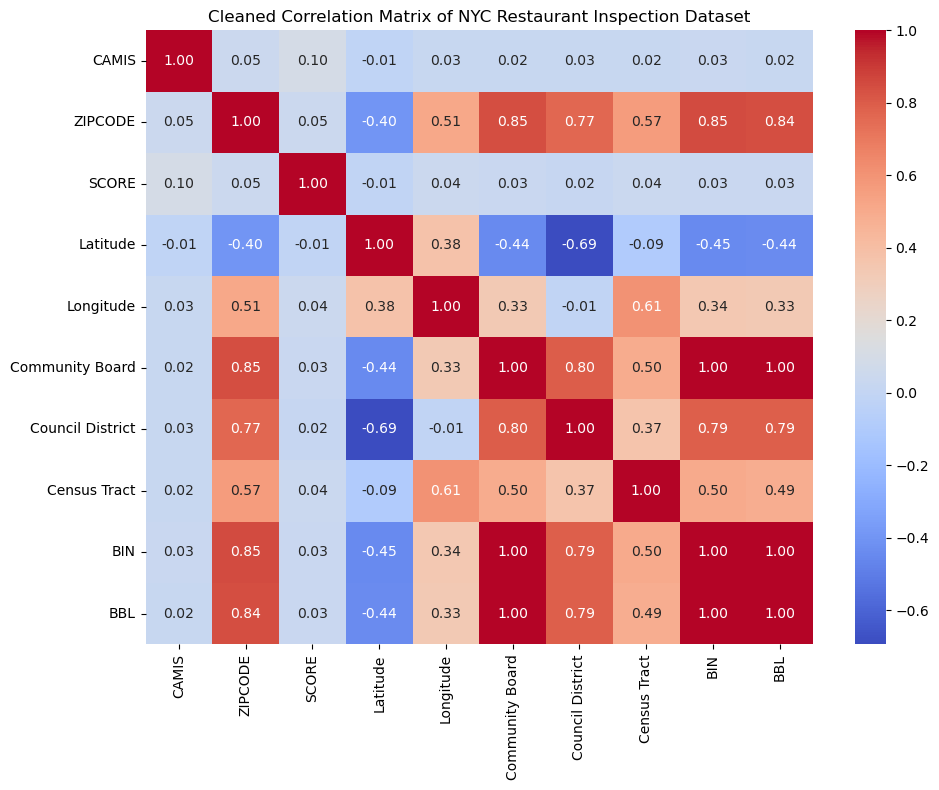

In [152]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

url = "https://data.cityofnewyork.us/api/views/43nn-pn8j/rows.csv?accessType=DOWNLOAD"
data_url = pd.read_csv(url)

numeric_data = data_url.select_dtypes(include=['float64', 'int64'])

numeric_data = numeric_data.dropna(axis=1, how='all')

numeric_data = numeric_data.dropna()

corr = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Cleaned Correlation Matrix of NYC Restaurant Inspection Dataset')
plt.tight_layout()
plt.show()


In [80]:
print(data2.shape)

(48874, 12)


In [52]:
data2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48874 entries, 0 to 48873
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   score                  48874 non-null  float64
 1   grade                  48874 non-null  object 
 2   violation_code         48874 non-null  object 
 3   violation_description  48874 non-null  object 
 4   cuisine_description    48874 non-null  object 
 5   dba                    48874 non-null  object 
 6   boro                   48874 non-null  object 
dtypes: float64(1), object(6)
memory usage: 2.6+ MB


In [54]:
data2.describe(include='all')


score  grade violation_code  \
count   48874.000000  48874          48874   
unique           NaN      6             69   
top              NaN      A            10F   
freq             NaN  33894           9469   
mean       15.937615    NaN            NaN   
std        12.645392    NaN            NaN   
min         0.000000    NaN            NaN   
25%        10.000000    NaN            NaN   
50%        12.000000    NaN            NaN   
75%        19.000000    NaN            NaN   
max       168.000000    NaN            NaN   

                                    violation_description cuisine_description  \
count                                               48874               48874   
unique                                                135                  87   
top     Non-food contact surface or equipment made of ...            American   
freq                                                 7742                8611   
mean                                                  NaN                 NaN   
std                                                   NaN                 NaN   
min                                                   NaN                 NaN   
25%                                                   NaN                 NaN   
50%                                                   NaN                 NaN   
75%                                                   NaN                 NaN   
max                                                   NaN                 NaN   

           dba       boro  
count    48874      48874  
unique   17389          5  
top     DUNKIN  Manhattan  
freq       838      18271  
mean       NaN        NaN  
std        NaN        NaN  
min        NaN        NaN  
25%        NaN        NaN  
50%        NaN        NaN  
75%        NaN        NaN  
max        NaN        NaN

In [56]:
data2.isnull().sum()


score                    0
grade                    0
violation_code           0
violation_description    0
cuisine_description      0
dba                      0
boro                     0
dtype: int64

<Figure size 1000x800 with 0 Axes>

<Axes: xlabel='Importance', ylabel='Feature'>

Text(0.5, 1.0, 'Feature Importances (Random Forest)')

Text(0.5, 0, 'Importance Score')

Text(0, 0.5, 'Feature')

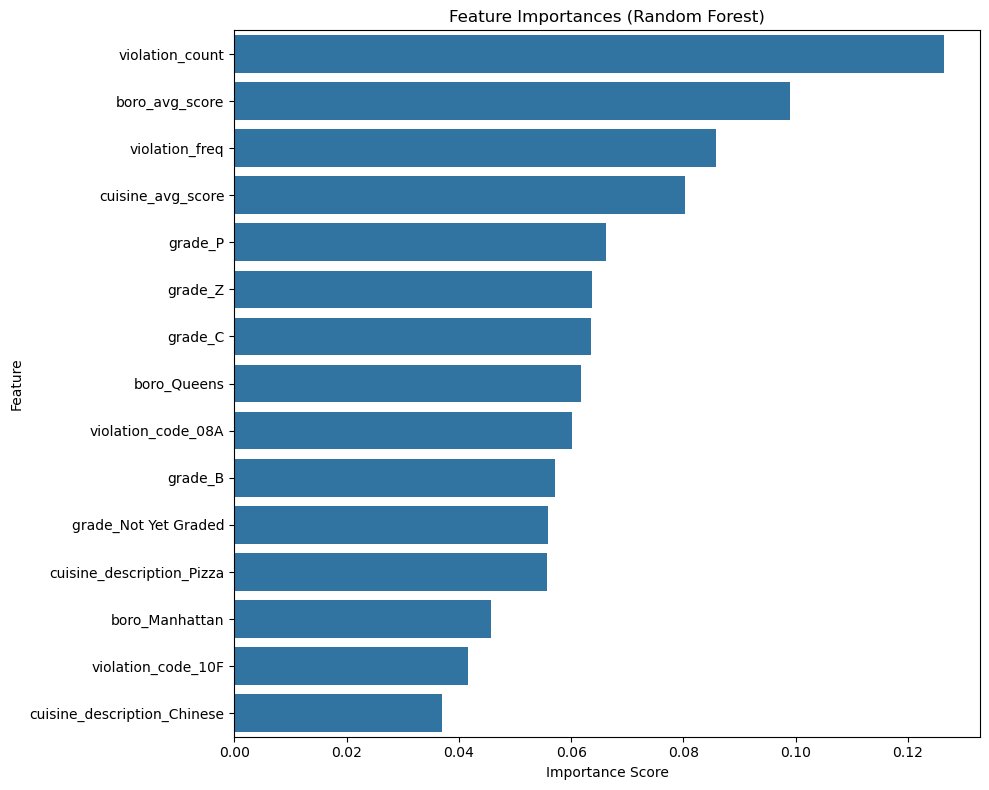

In [150]:
import matplotlib.pyplot as plt

importances = rf_model.feature_importances_
feature_names = X_encoded.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
plt.title('Feature Importances (Random Forest)')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


In [76]:
pip uninstall tensorflow


^C
Note: you may need to restart the kernel to use updated packages.


In [148]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

data2 = data2.dropna(subset=['violation_code'])

data2['violation_code'] = data2['violation_code'].astype(str)
y_class = data2['violation_code']

X_class = data2.drop(columns=['violation_code', 'score', 'dba', 'violation_description'], errors='ignore')

X_class_encoded = pd.get_dummies(X_class, drop_first=True)

# Train/test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(X_class_encoded, y_class, test_size=0.2, random_state=42)

rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_c, y_train_c)
y_pred_c = rf_clf.predict(X_test_c)

print("\nClassification Report (Violation Code):")
print(classification_report(y_test_c, y_pred_c))

print(" Confusion Matrix:")
print(confusion_matrix(y_test_c, y_pred_c))

print("Accuracy Score:", accuracy_score(y_test_c, y_pred_c))


RandomForestClassifier(random_state=42)


Classification Report (Violation Code):
              precision    recall  f1-score   support

         04L       1.00      1.00      1.00      3227
         08A       1.00      1.00      1.00      3310
         10F       1.00      1.00      1.00      3238

    accuracy                           1.00      9775
   macro avg       1.00      1.00      1.00      9775
weighted avg       1.00      1.00      1.00      9775

 Confusion Matrix:
[[3227    0    0]
 [   0 3310    0]
 [   0    0 3238]]
Accuracy Score: 1.0


In [146]:
import numpy as np

importances = rf_clf.feature_importances_
feat_names = X_train_c.columns
sorted_indices = np.argsort(importances)[::-1]

print(" Features:")
for i in sorted_indices[:15]:
    print(f"{feat_names[i]}: {importances[i]:.4f}")


 Features:
violation_count: 0.2174
grade_P: 0.0948
grade_Z: 0.0883
grade_Not Yet Graded: 0.0881
cuisine_avg_score: 0.0828
grade_B: 0.0811
boro_avg_score: 0.0788
grade_C: 0.0783
boro_Queens: 0.0547
cuisine_description_Pizza: 0.0480
cuisine_description_Chinese: 0.0460
boro_Manhattan: 0.0416


In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

data2['violation_code'] = data2['violation_code'].astype(str)

y_class = data2['violation_code']

X_class_cleaned = data2.drop(columns=[
    'violation_code',        
    'violation_freq',         
    'score_label',            
    'score',                  
    'violations',             
    'violation_description',  
    'dba'                     
], errors='ignore')

# One-hot encode categorical features
X_class_encoded = pd.get_dummies(X_class_cleaned, drop_first=True)

# Train/test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class_encoded, y_class, test_size=0.2, random_state=42
)

# Train Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train_c, y_train_c)

# Predict and evaluate
y_pred_c = rf_clf.predict(X_test_c)
print("\n Classification Report (Violation Code):")
print(classification_report(y_test_c, y_pred_c))

print(" Confusion Matrix:")
print(confusion_matrix(y_test_c, y_pred_c))

print(" Accuracy Score:", accuracy_score(y_test_c, y_pred_c))


RandomForestClassifier(random_state=42)


 Classification Report (Violation Code):
              precision    recall  f1-score   support

         04L       0.34      0.32      0.33      3227
         08A       0.35      0.33      0.34      3310
         10F       0.33      0.36      0.34      3238

    accuracy                           0.34      9775
   macro avg       0.34      0.34      0.34      9775
weighted avg       0.34      0.34      0.34      9775

 Confusion Matrix:
[[1032 1018 1177]
 [ 977 1096 1237]
 [1011 1057 1170]]
 Accuracy Score: 0.3373913043478261


RandomForestClassifier(class_weight='balanced', max_features='log2',
                       n_estimators=200, random_state=42)


Classification Report (Violation Code):
              precision    recall  f1-score   support

         04L       0.34      0.32      0.33      3227
         08A       0.35      0.33      0.34      3310
         10F       0.33      0.36      0.34      3238

    accuracy                           0.34      9775
   macro avg       0.34      0.34      0.34      9775
weighted avg       0.34      0.34      0.34      9775

Confusion Matrix:
[[1032 1018 1177]
 [ 977 1096 1237]
 [1011 1057 1170]]
Accuracy Score: 0.3373913043478261


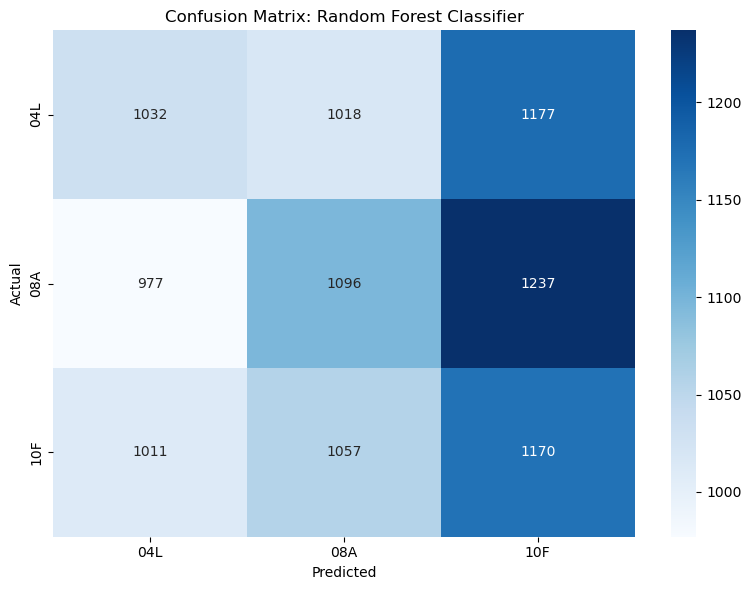

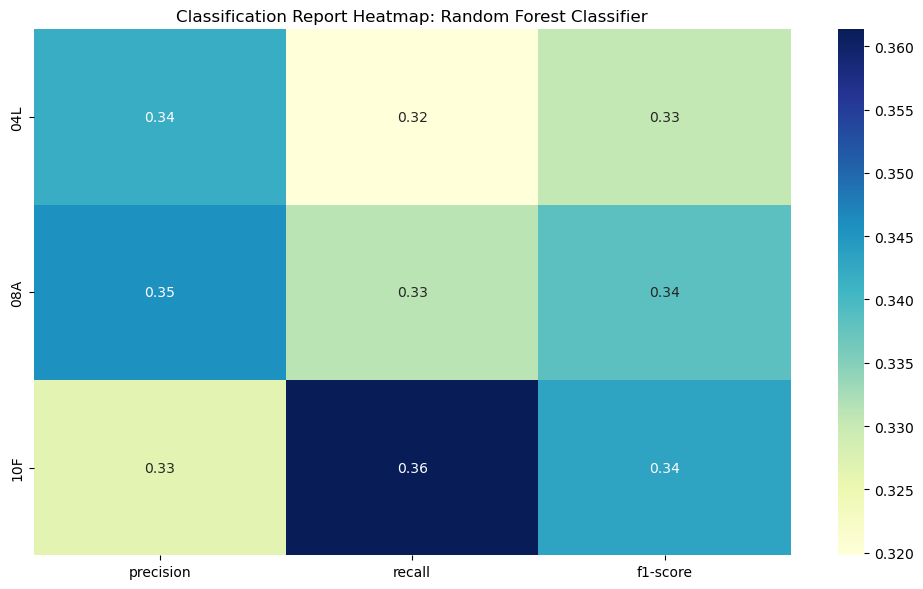

In [142]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import pandas as pd

data2['violation_code'] = data2['violation_code'].astype(str)

y_class = data2['violation_code']

X_class_cleaned = data2.drop(columns=[
    'violation_code', 'violation_freq', 'score_label', 'score',
    'violations', 'violation_description', 'dba'
], errors='ignore')

X_class_encoded = pd.get_dummies(X_class_cleaned, drop_first=True)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class_encoded, y_class, test_size=0.2, random_state=42
)

# Random Forest with tuned hyperparameters
rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_features='log2',       
    class_weight='balanced',   
    random_state=42
)
rf_clf.fit(X_train_c, y_train_c)

# Predict and evaluate
y_pred_c = rf_clf.predict(X_test_c)

print("\nClassification Report (Violation Code):")
print(classification_report(y_test_c, y_pred_c))

print("Confusion Matrix:")
print(confusion_matrix(y_test_c, y_pred_c))

print("Accuracy Score:", accuracy_score(y_test_c, y_pred_c))

import seaborn as sns
import matplotlib.pyplot as plt

def plot_conf_matrix_rf(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_class))  # use correct labels
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=np.unique(y_class), yticklabels=np.unique(y_class))
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

def plot_classification_report_rf(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title(f'Classification Report Heatmap: {model_name}')
    plt.tight_layout()
    plt.show()

plot_conf_matrix_rf(y_test_c, y_pred_c, "Random Forest Classifier")
plot_classification_report_rf(y_test_c, y_pred_c, "Random Forest Classifier")



In [140]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

data2['violation_code'] = data2['violation_code'].astype(str)

top_n = 5
top_violations = data2['violation_code'].value_counts().nlargest(top_n).index
filtered_data = data2[data2['violation_code'].isin(top_violations)].copy()

y_class = filtered_data['violation_code']

X_class_cleaned = filtered_data.drop(columns=[
    'violation_code', 'violation_freq', 'score_label', 'score',
    'violations', 'violation_description', 'dba'
], errors='ignore')

X_class_encoded = pd.get_dummies(X_class_cleaned, drop_first=True)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class_encoded, y_class, test_size=0.2, random_state=42
)

rf_clf = RandomForestClassifier(
    n_estimators=200,
    max_features='sqrt',      
    class_weight='balanced',
    random_state=42
)
rf_clf.fit(X_train_c, y_train_c)

y_pred_c = rf_clf.predict(X_test_c)

print("\n Classification Report (Top 5 Violation Codes):")
print(classification_report(y_test_c, y_pred_c))

print(" Confusion Matrix:")
print(confusion_matrix(y_test_c, y_pred_c))

print(" Accuracy Score:", accuracy_score(y_test_c, y_pred_c))


RandomForestClassifier(class_weight='balanced', n_estimators=200,
                       random_state=42)


 Classification Report (Top 5 Violation Codes):
              precision    recall  f1-score   support

         04L       0.34      0.32      0.33      3227
         08A       0.35      0.33      0.34      3310
         10F       0.33      0.36      0.34      3238

    accuracy                           0.34      9775
   macro avg       0.34      0.34      0.34      9775
weighted avg       0.34      0.34      0.34      9775

 Confusion Matrix:
[[1032 1018 1177]
 [ 977 1096 1237]
 [1011 1057 1170]]
 Accuracy Score: 0.3373913043478261



 Violation Codes:
Violation Code 10F: 16305 occurrences
Violation Code 08A: 16301 occurrences
Violation Code 04L: 16268 occurrences


<Figure size 1000x600 with 0 Axes>

<Axes: xlabel='violation_code'>

Text(0.5, 1.0, 'Violation Codes Codes')

Text(0.5, 0, 'Violation Code')

Text(0, 0.5, 'Count')

(array([0, 1, 2]), [Text(0, 0, '10F'), Text(1, 0, '08A'), Text(2, 0, '04L')])

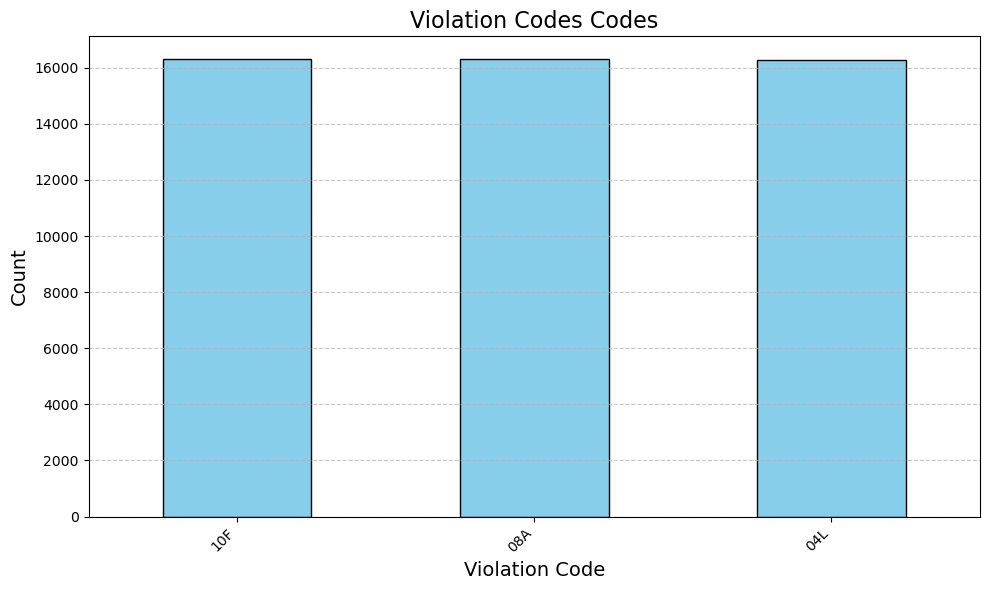

In [162]:
import matplotlib.pyplot as plt

data2['violation_code'] = data2['violation_code'].astype(str)

top_violations = data2['violation_code'].value_counts().nlargest(10)

print("\n Violation Codes:")
for code, count in top_violations.items():
    print(f"Violation Code {code}: {count} occurrences")

plt.figure(figsize=(10, 6))
top_violations.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Violation Codes Codes', fontsize=16)
plt.xlabel('Violation Code', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


LogisticRegression(class_weight='balanced', max_iter=1000,
                   multi_class='multinomial', random_state=42)


 Multinomial Logistic Regression Classification Report:
              precision    recall  f1-score   support

         04L       0.33      0.41      0.36      3227
         08A       0.33      0.33      0.33      3310
         10F       0.34      0.25      0.28      3238

    accuracy                           0.33      9775
   macro avg       0.33      0.33      0.33      9775
weighted avg       0.33      0.33      0.33      9775

 Confusion Matrix:
[[1326 1111  790]
 [1422 1089  799]
 [1311 1125  802]]
 Accuracy Score: 0.32910485933503836


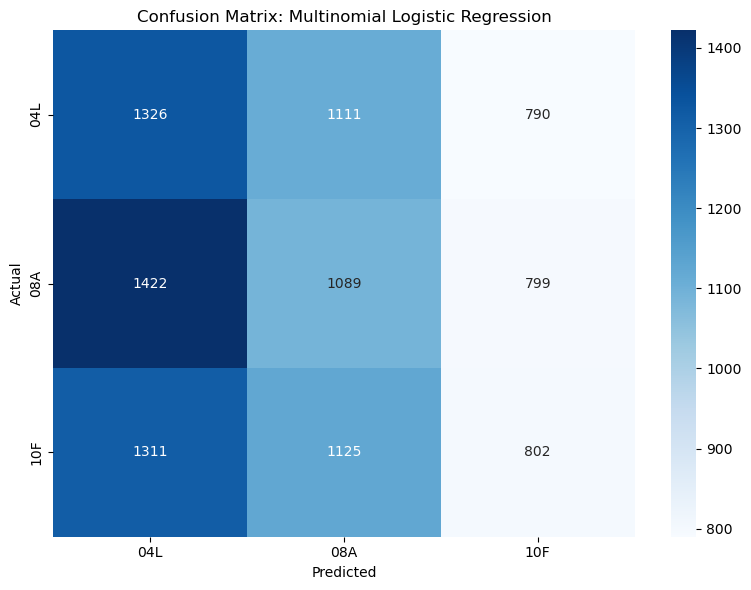

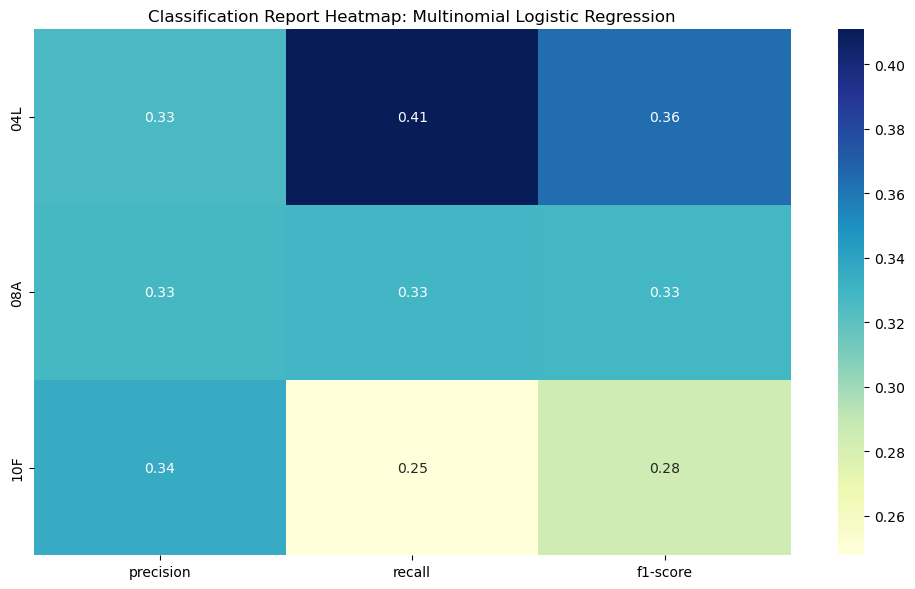

In [164]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import warnings

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

data2['violation_code'] = data2['violation_code'].astype(str)

top_n = 3
top_violations = data2['violation_code'].value_counts().nlargest(top_n).index
filtered_data = data2[data2['violation_code'].isin(top_violations)].copy()

# Target variable
y_class = filtered_data['violation_code']

# Drop leaky or irrelevant features
X_class_cleaned = filtered_data.drop(columns=[
    'violation_code', 'violation_freq', 'score_label', 'score',
    'violations', 'violation_description', 'dba'
], errors='ignore')

X_class_encoded = pd.get_dummies(X_class_cleaned, drop_first=True)

X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class_encoded, y_class, test_size=0.2, random_state=42
)

log_reg_multi = LogisticRegression(
    multi_class='multinomial',  
    solver='lbfgs',              
    max_iter=1000,
    class_weight='balanced',    
    random_state=42
)
log_reg_multi.fit(X_train_c, y_train_c)

y_pred_c = log_reg_multi.predict(X_test_c)

# Output evaluation
print("\n Multinomial Logistic Regression Classification Report:")
print(classification_report(y_test_c, y_pred_c))

print(" Confusion Matrix:")
print(confusion_matrix(y_test_c, y_pred_c))

print(" Accuracy Score:", accuracy_score(y_test_c, y_pred_c))

import seaborn as sns
import matplotlib.pyplot as plt

def plot_conf_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred, labels=np.unique(y_class))  
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=np.unique(y_class), yticklabels=np.unique(y_class))
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

def plot_classification_report(y_true, y_pred, model_name):
    report = classification_report(y_true, y_pred, output_dict=True)
    report_df = pd.DataFrame(report).transpose()
    report_df = report_df.drop(['accuracy', 'macro avg', 'weighted avg'], errors='ignore')

    plt.figure(figsize=(10, 6))
    sns.heatmap(report_df[['precision', 'recall', 'f1-score']], annot=True, cmap='YlGnBu', fmt='.2f')
    plt.title(f'Classification Report Heatmap: {model_name}')
    plt.tight_layout()
    plt.show()

plot_conf_matrix(y_test_c, y_pred_c, "Multinomial Logistic Regression")
plot_classification_report(y_test_c, y_pred_c, "Multinomial Logistic Regression")



In [106]:
pip install xgboost



   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.0/150.0 MB 445.2 kB/s eta 0:05:37
   ---------------------------------------- 0.2/150.0 MB 2.1 MB/s eta 0:01:12
   ---------------------------------------- 1.2/150.0 MB 8.8 MB/s eta 0:00:17
    --------------------------------------- 3.0/150.0 MB 15.9 MB/s eta 0:00:10
   - -------------------------------------- 4.8/150.0 MB 20.3 MB/s eta 0:00:08
   - -------------------------------------- 6.2/150.0 MB 22.2 MB/s eta 0:00:07
   -- ------------------------------------- 7.7/150.0 MB 23.5 MB/s eta 0:00:07
   -- ------------------------------------- 9.6/150.0 MB 25.4 MB/s eta 0:00:06
   --- ------------------------------------ 11.3/150.0 MB 34.6 MB/s eta 0:00:05
   --- ------------------------------------ 12.8/150.0 MB 34.4 MB/s eta 0:00:04
   --- ------------------------------------ 14.0/150.0 MB 32.8 MB/

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, feature_weights=None, gamma=None,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=300, n_jobs=None, num_class=5, ...)


 XGBoost Classification Report:
              precision    recall  f1-score   support

         04L       0.34      0.33      0.34      3227
         08A       0.34      0.33      0.34      3310
         10F       0.32      0.35      0.34      3238

    accuracy                           0.34      9775
   macro avg       0.34      0.34      0.34      9775
weighted avg       0.34      0.34      0.34      9775

 Confusion Matrix:
[[1064 1014 1149]
 [1009 1092 1209]
 [1045 1062 1131]]
Accuracy Score: 0.33626598465473145


<Figure size 1200x800 with 0 Axes>

<Axes: title={'center': 'Feature importance'}, xlabel='Importance score', ylabel='Features'>

Text(0.5, 1.0, 'Top 15 Feature Importances (XGBoost)')

<Figure size 1200x800 with 0 Axes>

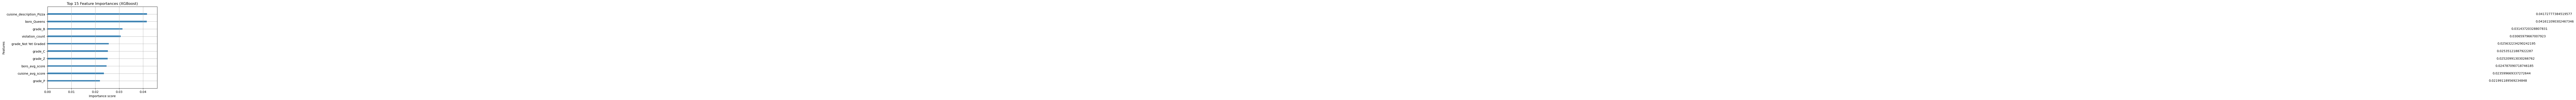

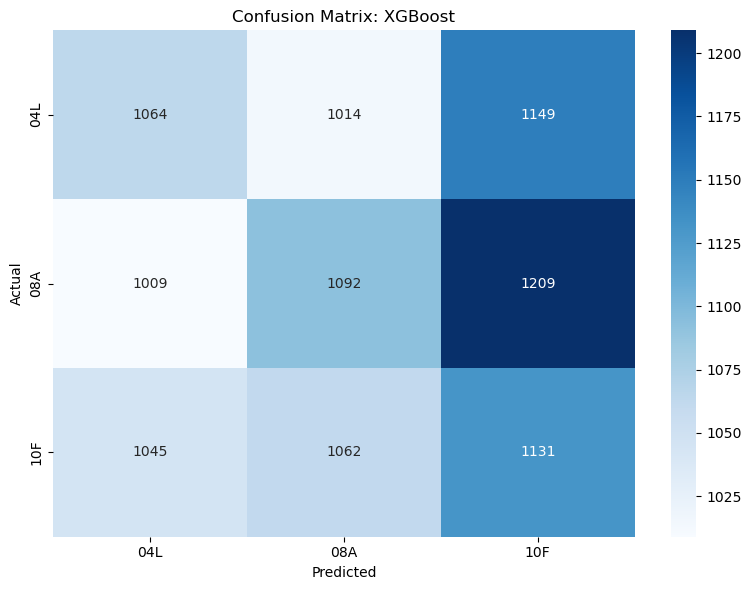

In [166]:
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

data2['violation_code'] = data2['violation_code'].astype(str)

top_n = 5
top_violations = data2['violation_code'].value_counts().nlargest(top_n).index
filtered_data = data2[data2['violation_code'].isin(top_violations)].copy()

y_class = filtered_data['violation_code']

le = LabelEncoder()
y_class_encoded = le.fit_transform(y_class)

X_class_cleaned = filtered_data.drop(columns=[
    'violation_code', 'violation_freq', 'score_label', 'score',
    'violations', 'violation_description', 'dba'
], errors='ignore')

X_class_encoded = pd.get_dummies(X_class_cleaned, drop_first=True)

# Train/test split
X_train_c, X_test_c, y_train_c, y_test_c = train_test_split(
    X_class_encoded, y_class_encoded, test_size=0.2, random_state=42
)

xgb_model = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=top_n,
    eval_metric='mlogloss',
    use_label_encoder=False,
    n_estimators=300,
    max_depth=6,
    learning_rate=0.1,
    random_state=42
)
xgb_model.fit(X_train_c, y_train_c)

y_pred_c = xgb_model.predict(X_test_c)

y_test_labels = le.inverse_transform(y_test_c)
y_pred_labels = le.inverse_transform(y_pred_c)

print("\n XGBoost Classification Report:")
print(classification_report(y_test_labels, y_pred_labels))

print(" Confusion Matrix:")
print(confusion_matrix(y_test_labels, y_pred_labels))

print("Accuracy Score:", accuracy_score(y_test_labels, y_pred_labels))

plt.figure(figsize=(12, 8))
xgb.plot_importance(xgb_model, max_num_features=15, importance_type='gain')
plt.title('Top 15 Feature Importances (XGBoost)')
plt.show()


import seaborn as sns

def plot_conf_matrix(y_true_labels, y_pred_labels, model_name):
    cm = confusion_matrix(y_true_labels, y_pred_labels, labels=le.classes_)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_)
    plt.title(f'Confusion Matrix: {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.tight_layout()
    plt.show()

plot_conf_matrix(y_test_labels, y_pred_labels, "XGBoost")



In [112]:
data2['violation_code'] = data2['violation_code'].astype(str)

all_violation_codes = data2['violation_code'].unique()

all_violation_codes = sorted(all_violation_codes)

print(f"Total Unique Violation Codes: {len(all_violation_codes)}\n")
for code in all_violation_codes:
    print(code)


Total Unique Violation Codes: 3

04L
08A
10F


In [114]:
print("Columns in data2:")
for col in data2.columns:
    print(col)


Columns in data2:
score
grade
violation_code
violation_description
cuisine_description
dba
boro
violation_count
violation_freq
boro_avg_score
cuisine_avg_score
score_label


ImportError: Traceback (most recent call last):
  File "C:\Users\Pasupuleti\anaconda3\Lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 73, in <module>
    from tensorflow.python._pywrap_tensorflow_internal import *
ImportError: DLL load failed while importing _pywrap_tensorflow_internal: A dynamic link library (DLL) initialization routine failed.


Failed to load the native TensorFlow runtime.
See https://www.tensorflow.org/install/errors for some common causes and solutions.
If you need help, create an issue at https://github.com/tensorflow/tensorflow/issues and include the entire stack trace above this error message.

ValueError: y contains previously unseen labels: ['04L' '08A' '10F']